This notebook is used to demonstrate underfit, overfit and good fit of a linear regression model

In [1]:
# create the data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.arange(-2, 6.1, 0.5).reshape(-1, 1)
np.random.seed(42)
Z = np.random.normal(0, 1, size=X.shape)
Y = (X**2+X-10 + Z).reshape(-1, 1)

In [2]:
# split to train, test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

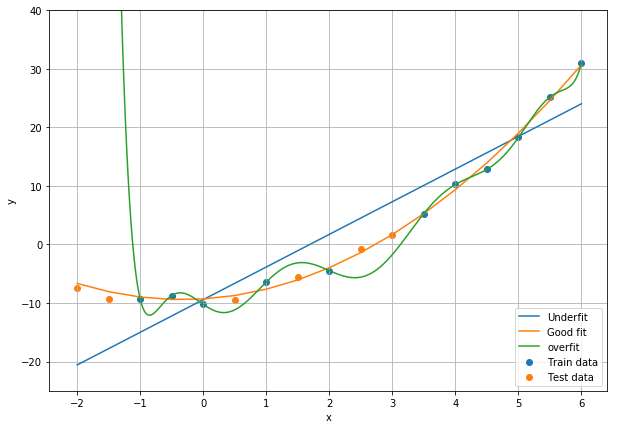

In [3]:
# Visualization 

# data
plt.figure(figsize=(10,7))
plt.scatter(X_train, Y_train, label="Train data")
plt.scatter(X_test, Y_test, label="Test data")

# underfit model
from sklearn.linear_model import LinearRegression as LR
lr1 = LR().fit(X_train, Y_train)
y_pr1 = lr1.predict(X)
plt.plot(X, y_pr1, label="Underfit")

# good fit model
lr2 = LR()
# create more feature
X_train2 = np.stack([X_train, X_train**2], axis=1).reshape(-1,2)
lr2.fit(X_train2, Y_train)
XX = np.stack([X, X**2], axis=1).reshape(-1,2)
y_pr2 = lr2.predict(XX)
plt.plot(X, y_pr2, label='Good fit')

# overfit model
X10 = X_train.copy()
for i in range(2, 11):
    X10 = np.concatenate([X10, X_train**i], axis=1)
lr3 = LR()
lr3.fit(X10, Y_train)
x = np.arange(-2, 6.01, 0.02).reshape(-1,1)
xx = x.copy()
for i in range(2, 11):
    xx = np.concatenate([xx, x**i], axis=1)
y_pr3 = lr3.predict(xx)
plt.plot(x, y_pr3, label='overfit')

plt.axis([None, None, -25, 40])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

All lines are linear regression model. They are called "linear" because they are linear combinations of coefficients (weights). As we can see from the graph, overfit model tries to draw line through every point (try to learn each data point) and have a big error when x = -2. Underfit model has big error at almost data points, while good-fit model simutalneously try to draw line through every point and learn the overall rule. It has minimum sum of errors.